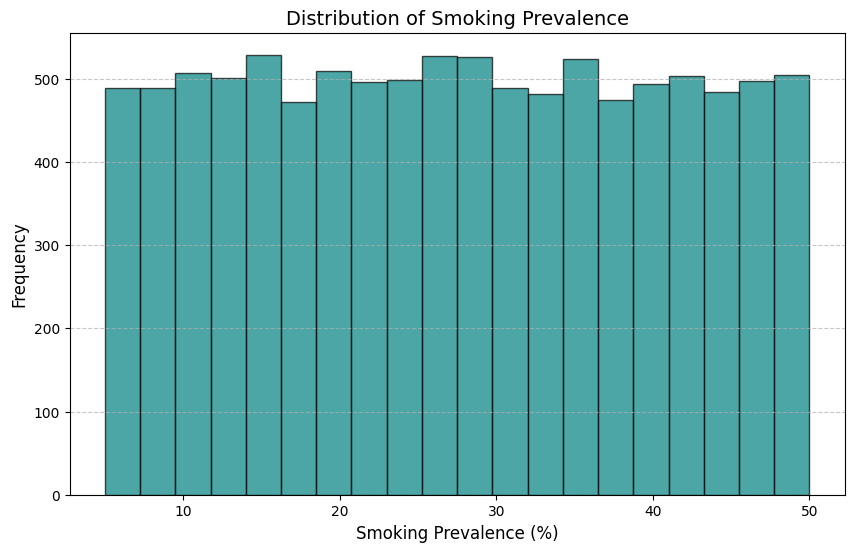

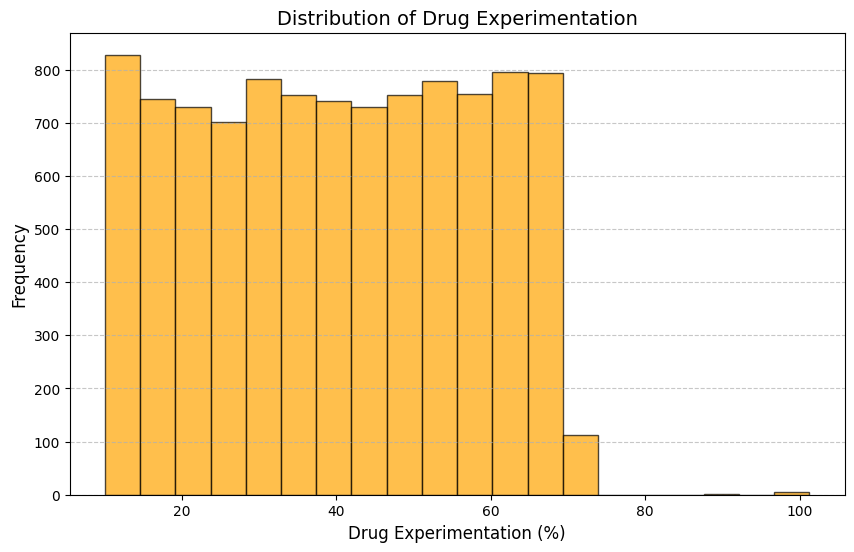

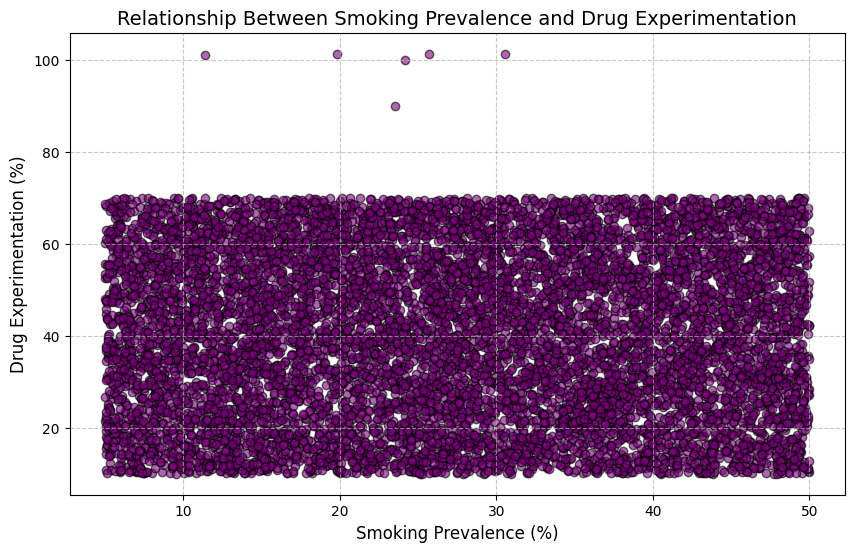

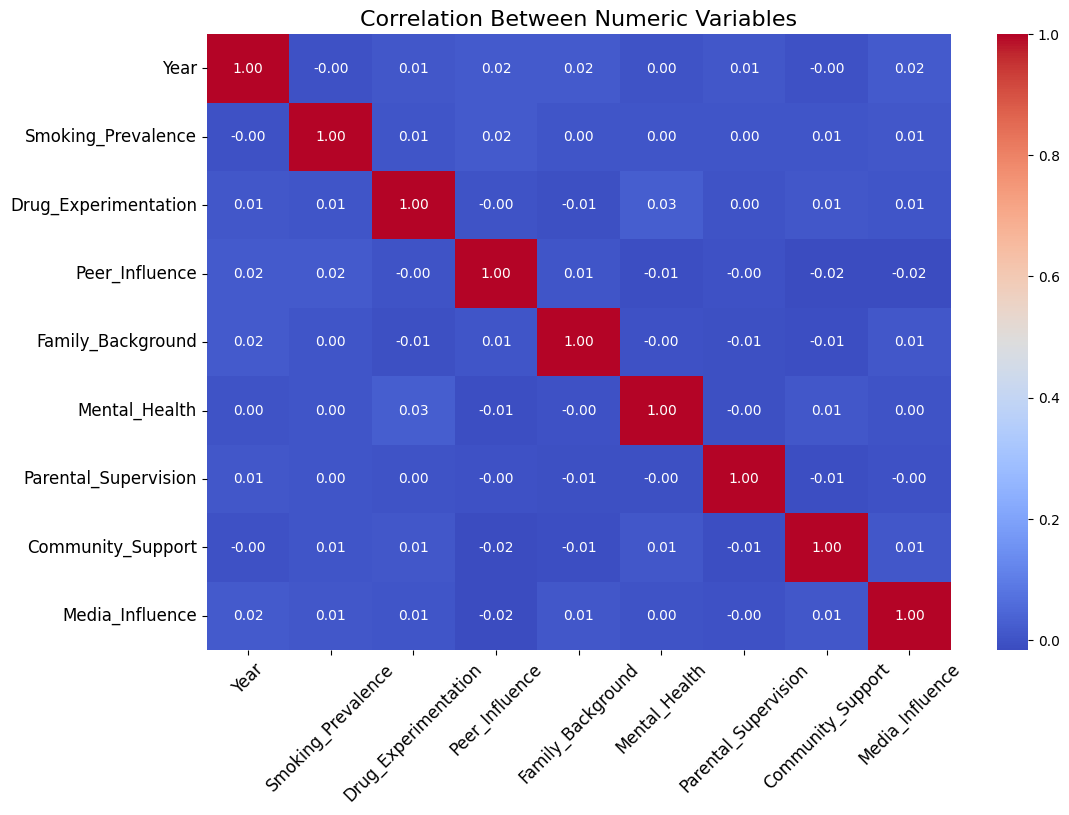

<ipython-input-1-568f867f49b2>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y='Smoking_Prevalence', x='Age_Group', palette='cool', linewidth=2)


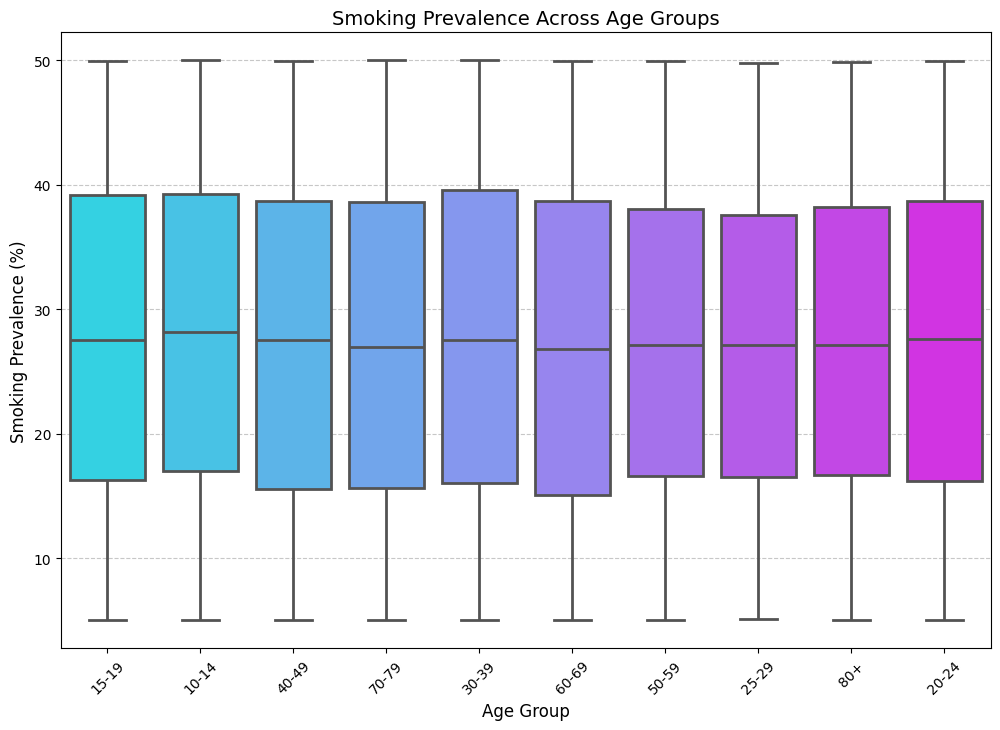

<ipython-input-1-568f867f49b2>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y='Drug_Experimentation', x='Gender', palette='Set3', linewidth=2)


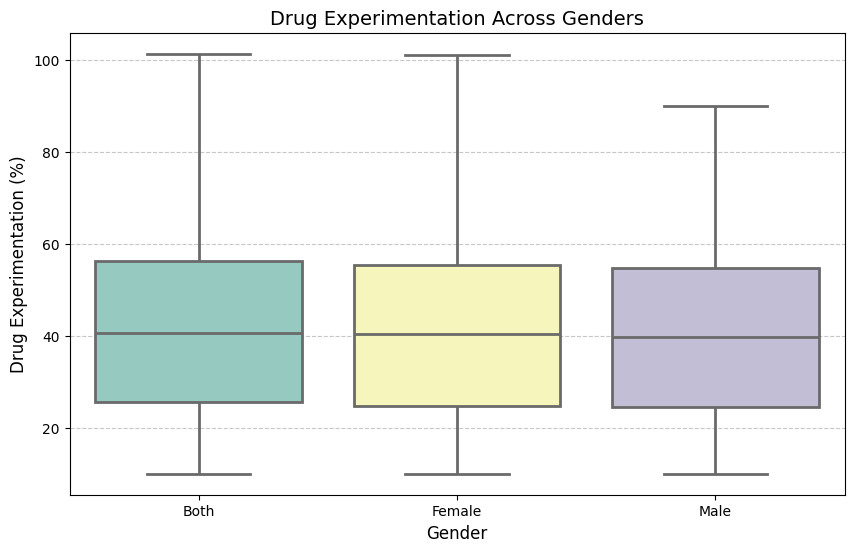

Average Smoking Prevalence and Drug Experimentation by Age Group:
           Smoking_Prevalence  Drug_Experimentation
Age_Group                                          
10-14               28.087329             40.642701
15-19               27.486395             40.304536
20-24               27.430689             39.889598
25-29               27.290618             40.692429
30-39               27.691726             40.454172
40-49               27.376733             40.202950
50-59               27.518152             39.555804
60-69               27.053387             40.159765
70-79               27.272956             38.831013
80+                 27.398059             40.898836

Average Smoking Prevalence and Drug Experimentation by Gender:
        Smoking_Prevalence  Drug_Experimentation
Gender                                          
Both             27.588441             40.515098
Female           27.412792             40.158596
Male             27.381138             39.818667


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Youth Drug Data.csv')

# Fix inconsistencies in categorical variables
data['Gender'] = data['Gender'].replace({'Femal': 'Female'})
data['Age_Group'] = data['Age_Group'].replace({'14-Oct': '10-14'})

# Impute missing values in 'Smoking_Prevalence'
smoking_mean = data['Smoking_Prevalence'].mean()
data['Smoking_Prevalence'] = data['Smoking_Prevalence'].fillna(smoking_mean)

# Handle outliers in 'Drug_Experimentation' using the IQR method
Q1 = data['Drug_Experimentation'].quantile(0.25)
Q3 = data['Drug_Experimentation'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
data['Drug_Experimentation'] = np.where(data['Drug_Experimentation'] > upper_bound, upper_bound, data['Drug_Experimentation'])

# Plot 1: Smoking Prevalence Distribution
plt.figure(figsize=(10, 6))
plt.hist(data['Smoking_Prevalence'], bins=20, color='teal', alpha=0.7, edgecolor='black')
plt.title('Distribution of Smoking Prevalence', fontsize=14)
plt.xlabel('Smoking Prevalence (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot 2: Drug Experimentation Distribution
plt.figure(figsize=(10, 6))
plt.hist(data['Drug_Experimentation'], bins=20, color='orange', alpha=0.7, edgecolor='black')
plt.title('Distribution of Drug Experimentation', fontsize=14)
plt.xlabel('Drug Experimentation (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot 3: Scatterplot for Smoking Prevalence vs. Drug Experimentation
plt.figure(figsize=(10, 6))
plt.scatter(data['Smoking_Prevalence'], data['Drug_Experimentation'], alpha=0.6, color='purple', edgecolor='black')
plt.title('Relationship Between Smoking Prevalence and Drug Experimentation', fontsize=14)
plt.xlabel('Smoking Prevalence (%)', fontsize=12)
plt.ylabel('Drug Experimentation (%)', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

# Plot 4: Correlation Heatmap
plt.figure(figsize=(12, 8))
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size":10})
plt.title('Correlation Between Numeric Variables', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

# Plot 5: Boxplot for Smoking Prevalence by Age Group
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, y='Smoking_Prevalence', x='Age_Group', palette='cool', linewidth=2)
plt.title('Smoking Prevalence Across Age Groups', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Smoking Prevalence (%)', fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot 6: Boxplot for Drug Experimentation by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, y='Drug_Experimentation', x='Gender', palette='Set3', linewidth=2)
plt.title('Drug Experimentation Across Genders', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Drug Experimentation (%)', fontsize=12)
plt.xticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Group Summaries
age_group_summary = data.groupby('Age_Group')[['Smoking_Prevalence', 'Drug_Experimentation']].mean()
gender_summary = data.groupby('Gender')[['Smoking_Prevalence', 'Drug_Experimentation']].mean()

print("Average Smoking Prevalence and Drug Experimentation by Age Group:")
print(age_group_summary)

print("\nAverage Smoking Prevalence and Drug Experimentation by Gender:")
print(gender_summary)
